#### <center><img src="https://user-images.githubusercontent.com/47216809/86511259-ef33e380-be14-11ea-8ea3-3a3cc4ff5ce8.jpg" style="width: 700px;"/>

# Wine Quality Prediction

## Business Objective
Predict whether a wine is of good or bad quality based on factors such as chemical composition and other relevant attributes. This objective aims to provide an objective measure of wine quality that helps stakeholders differentiate between wines that meet high-quality standards and those that fall below expectations.

## Business Metrics
Measure the accuracy and consistency of the model’s predictions across different wines. This metric indicates the reliability of the model in consistently assessing wine quality and can help ensure that wines are classified correctly.

### Contents:

1. Importing the Libraries
2. Read Dataset
3. Dataset Overview
4. EDA
5. Data Preprocessing
6. Model Building
7. Conclusion

### 1. Importing the Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

# Importing required libraries 
import pandas as pd 
import numpy as np
import math 

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the required libraries for  regression models
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error


# Importing required libraries for Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

### 2. Read Dataset

In [2]:
# Reading data from csv file
data = pd.read_csv("Wine.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Understanding the different features of wine, we see that there are a total of 12 columns including the final quality parameter.

| Feature   | Description|
|-----------|-----------|
|Fixed Acidity | are non-volatile acids that do not evaporate readily|
|Volatile Acidity | are high acetic acid in wine which leads to an unpleasant vinegar taste|
|Citric Acid | acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines|
|Residual Sugar | is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet|
|Chlorides | the amount of salt in the wine|
|Free Sulfur Dioxide | it prevents microbial growth and the oxidation of wine|
|Total Sulfur Dioxide | is the amount of free + bound forms of SO2|
|Density |sweeter wines have a higher density|
|pH |describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale|
|Alcohol |available in small quantities in wines makes the drinkers sociable|
|Sulphates | a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant|
|Quality | which is the output variable/predictor|


### 3. Dataset Overview

In [3]:
data.shape #shape of dataset

(1599, 12)

In [4]:
data.info() # checking the datatype of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.isnull().sum() # checking the null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**There is No Null Value**

In [6]:
data.describe() # Statistical summery

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.dtypes #datatypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### 4. EDA

In [8]:
#  check if data is balanced or imbalanced
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

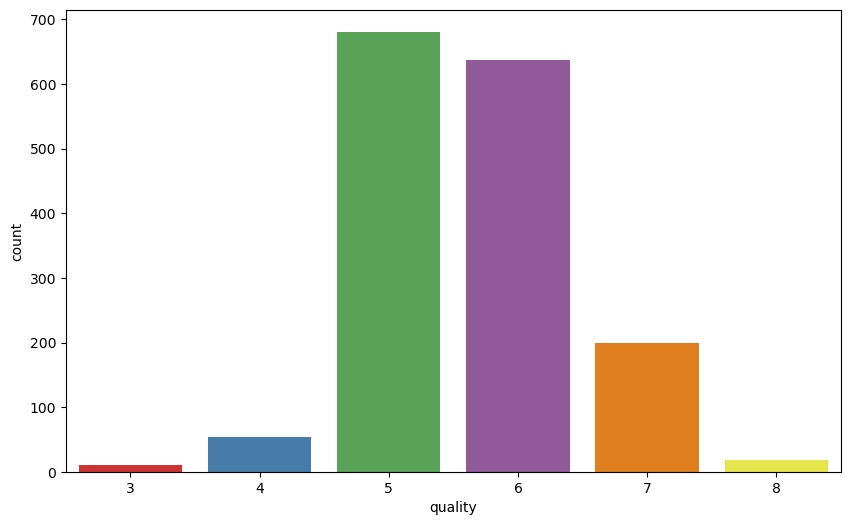

In [9]:
# Plotting a histogram to view how the 'Low' feature is laid out.
plt.figure(figsize = (10, 6))
sns.countplot(x = 'quality', data = data, palette = 'Set1')
plt.show()

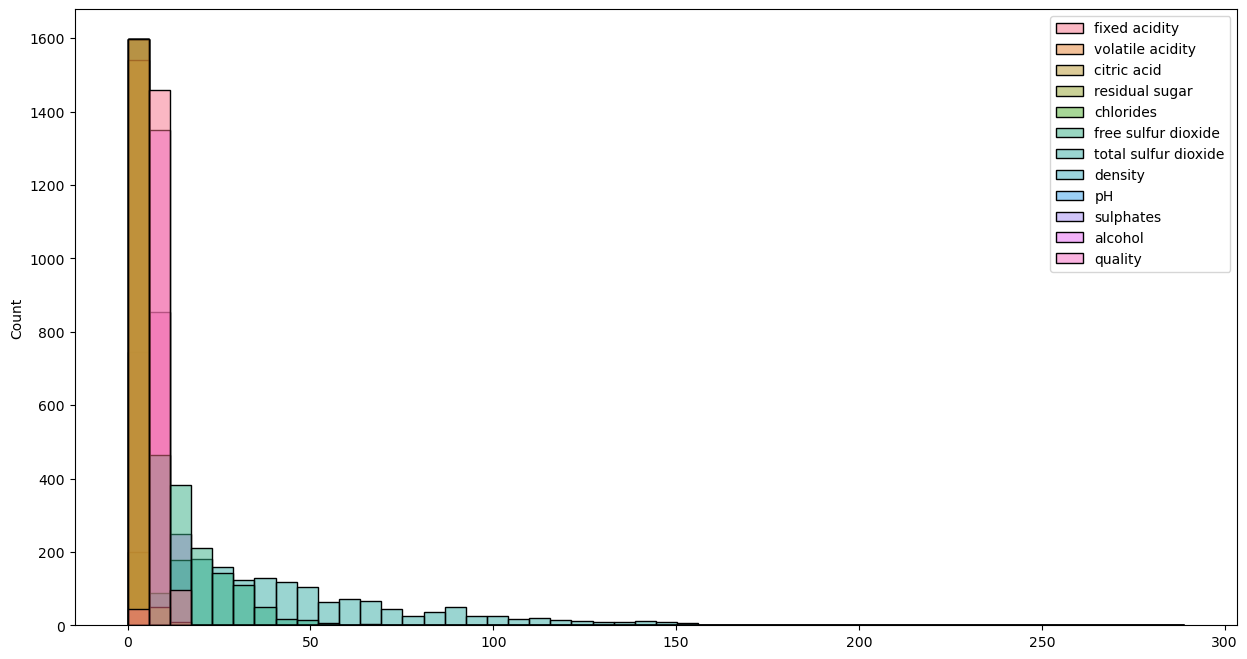

In [10]:
# Plotting a histogram to view how the 'Low' feature is laid out.
plt.figure(figsize = (15, 8))
sns.histplot(data = data, bins = 50)
plt.show()

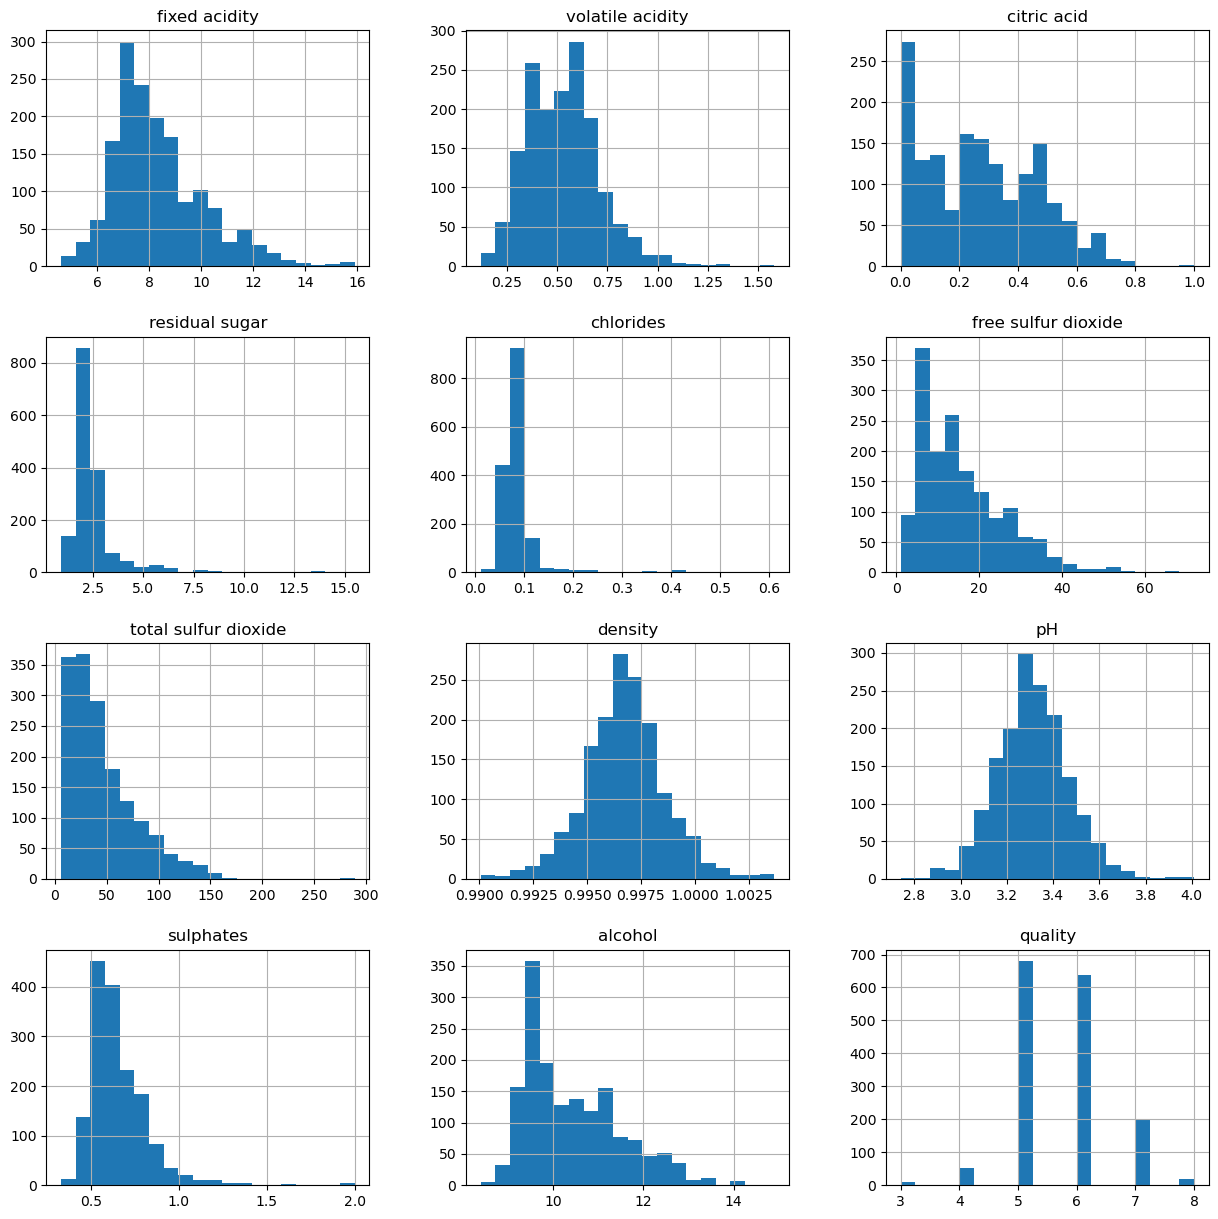

In [11]:
# Plotting a histogram to view how the 'Low' feature is laid out.
data.hist(bins=20,figsize=(15,15))
#plot showing
plt.show()

In [12]:
data.corr() # Correaltion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [13]:
data['pH']

0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1599, dtype: float64

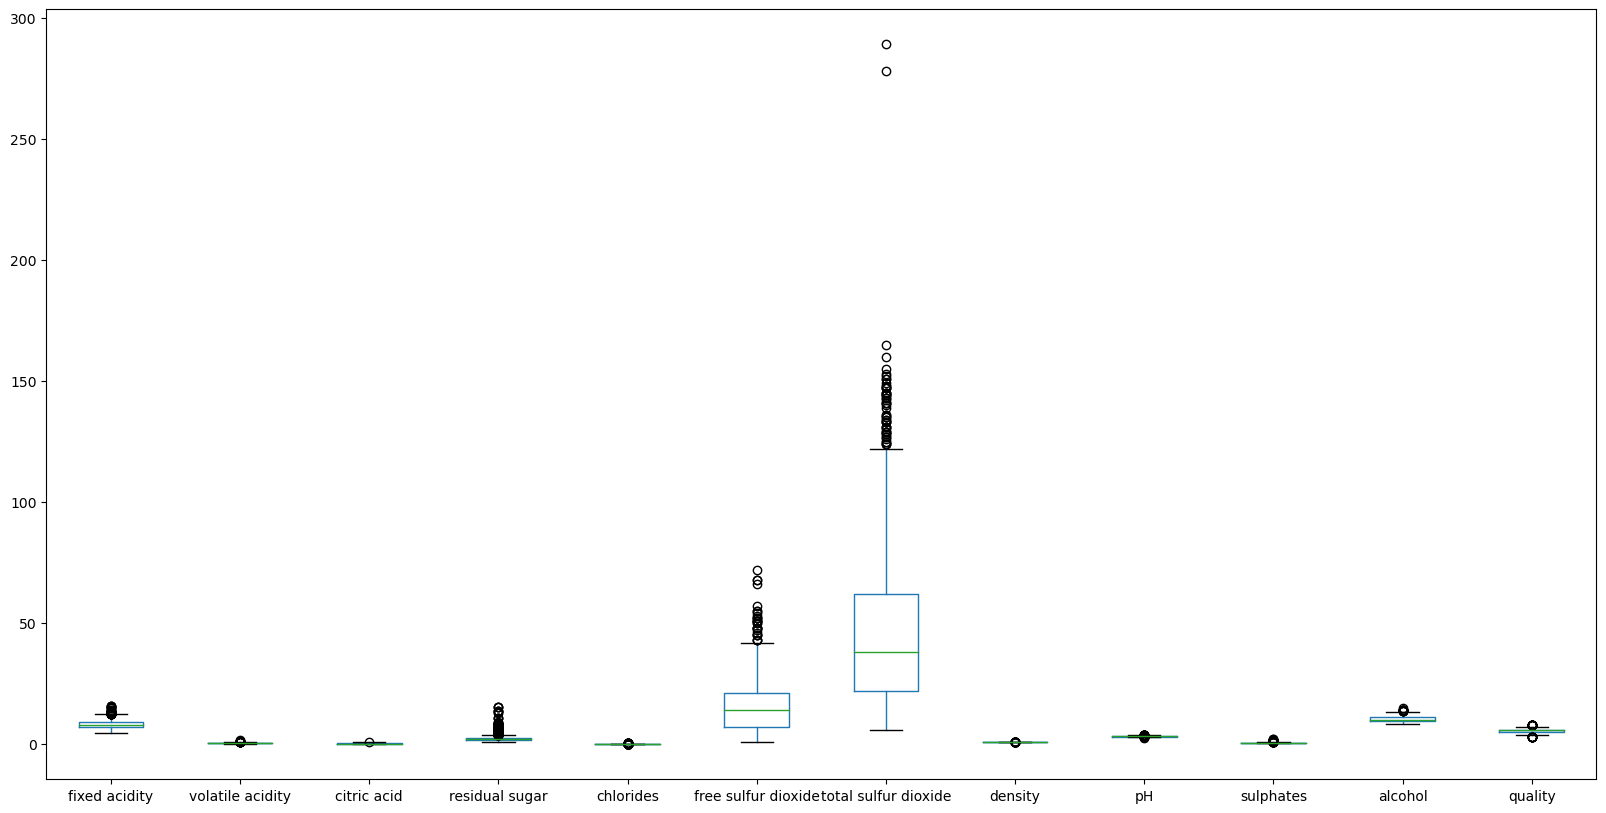

In [14]:
# Looking for outliers using boxplot from ---
# data['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']


fig = plt.figure(figsize = (20,10))
data.boxplot(column=[name for name in list(data)], grid=False)
plt.show()

**Insight :**
We used the boxplot for Checking the outliers in the data as you can see the different observation in the data are the outliers let's find outliers with inter quartile range rule

In [15]:
def outliers_detection(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return np.where((x > upper_bound) | (x < lower_bound))

In [16]:
outliers_detection(data['quality'])# index of Outliers

(array([ 267,  278,  390,  440,  455,  459,  481,  495,  498,  517,  588,
         690,  828,  832,  899, 1061, 1090, 1120, 1202, 1269, 1299, 1374,
        1403, 1449, 1469, 1478, 1505, 1549], dtype=int64),)

In [17]:
def Outliers(data):
    for feature in data.columns[:-1]:
        d = data[feature]
        iqr = d.quantile(0.75) - d.quantile(0.25)
        Min = d.quantile(0.25) - 1.5*iqr
        Max = d.quantile(0.75) + 1.5*iqr 
        outliers = data[(d > Max ) | ( d < Min )]
        p = outliers.groupby(by = 'quality').count().reset_index()
        print('Total outliers for ' + feature + " feature : " + str(outliers[feature].count()))
        
Outliers(data)

Total outliers for fixed acidity feature : 49
Total outliers for volatile acidity feature : 19
Total outliers for citric acid feature : 1
Total outliers for residual sugar feature : 155
Total outliers for chlorides feature : 112
Total outliers for free sulfur dioxide feature : 30
Total outliers for total sulfur dioxide feature : 55
Total outliers for density feature : 45
Total outliers for pH feature : 35
Total outliers for sulphates feature : 59
Total outliers for alcohol feature : 13


In [18]:
index = data['free sulfur dioxide'] > 0 
for feature in data[:-1]:
    d = data[feature]
    iqr = d.quantile(0.75) - d.quantile(0.25)
    Min = d.quantile(0.25) - 1.5*iqr
    Max = d.quantile(0.75) + 1.5*iqr 
    index = ((d <= Max) & (d >= Min)) & index 
    
new_data = data[index]

In [19]:
data.shape

(1599, 12)

In [20]:
new_data.shape

(1179, 12)

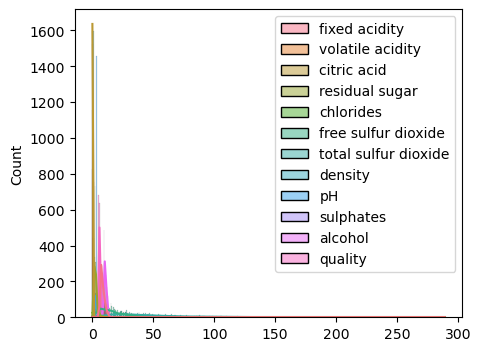

In [21]:
plt.figure(figsize = (5, 4))
sns.histplot(data = data, kde = True)
plt.show()

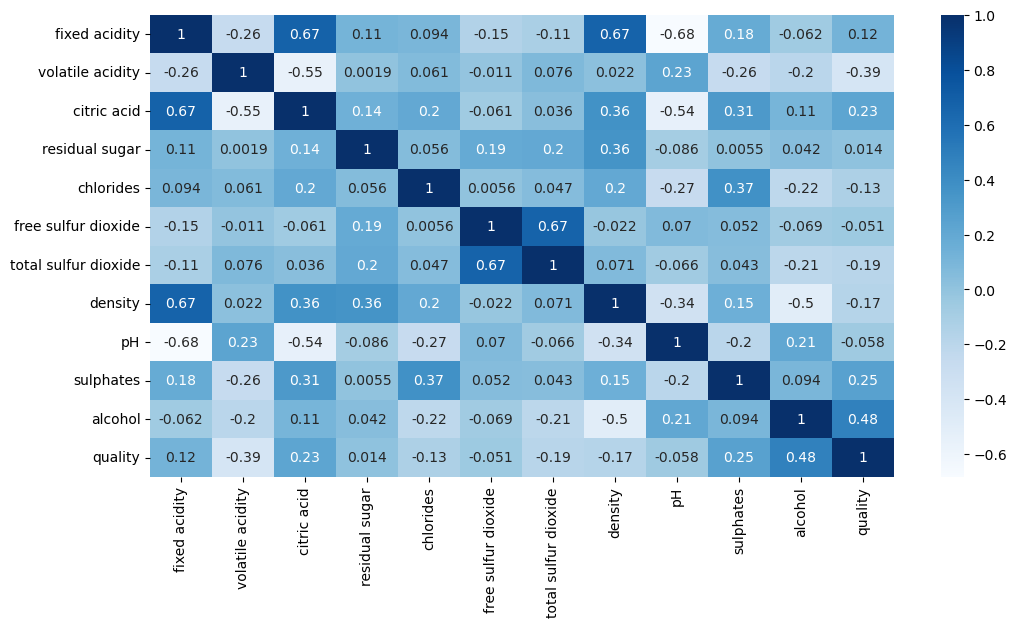

In [22]:
# Heatmap

plt.figure(figsize = (12, 6))
sns.heatmap(data.corr(), annot = True, cmap = "Blues")
plt.show()

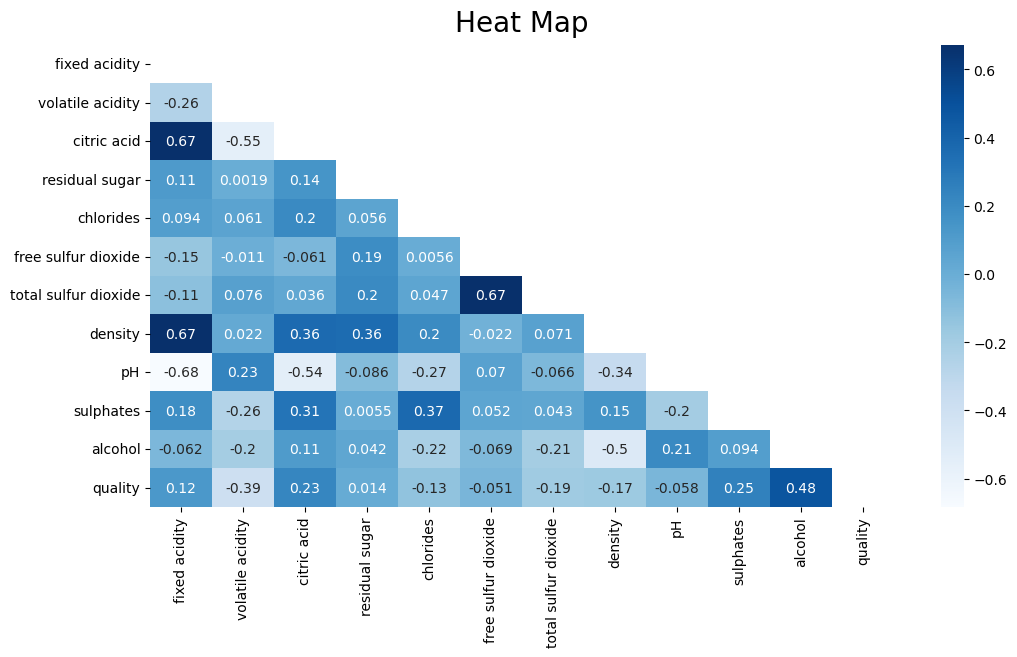

In [23]:
# You will not loose any information if you cut down one part of the heatmap along the diagonal

mask = np.triu(np.ones_like(data.corr(), dtype=bool))
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(data.corr(), cmap="Blues", annot=True, mask=mask)
heatmap.set_title("Heat Map", fontsize=20, pad=10)
plt.show()


**Insight :**
The data in Dark blue columns is highly correlated while the Light blue column is less correlated , you can say the correlation is increasing from Light blue to Dark Blue.

**Now the basic Cleaning, EDA and feature Engineering is done , now Building the machine learning model.**


##### Good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.

### 5. Data Preprocessing

In [24]:
# Separating the data or data pre- processing

X = data[['residual sugar', 'alcohol', 'pH','volatile acidity', 'sulphates' ]]
y = data['quality']

In [25]:
data.quality.shape

(1599,)

In [26]:
y.shape

(1599,)

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [28]:
xtrain.shape , xtest.shape ,ytrain.shape  , ytest.shape # Training and testing data

((1279, 5), (320, 5), (1279,), (320,))

In [29]:
y_test = np.array(ytest)

In [30]:
# Feature Scaling

norm = MinMaxScaler()

norm_fit = norm.fit(xtrain)

xtrain = norm_fit.transform(xtrain)
xtest = norm_fit.transform(xtest)

### 6. Model Building

#### 1. Logistic Regression

In [31]:
#Using Logistic Regression Algorithm to the Training Set
log = LogisticRegression(random_state = 0)

In [32]:
logistic = log.fit(xtrain, ytrain)
print(logistic)

LogisticRegression(random_state=0)


In [33]:
print('Model accuracy on the training data :')
print('Logistic Regression Training Accuracy:', log.score(xtrain, ytrain))

Model accuracy on the training data :
Logistic Regression Training Accuracy: 0.5590304925723222


In [34]:
prediction1 = logistic.predict(xtest)
print(prediction1)

[6 5 6 5 6 5 5 6 5 5 5 5 6 6 5 6 7 6 6 5 6 5 6 7 5 5 5 6 5 6 6 6 6 5 6 6 5
 5 6 6 5 6 7 6 6 5 5 6 6 6 5 5 5 7 5 5 5 5 6 5 5 6 6 6 5 6 5 6 6 6 5 6 5 5
 6 6 5 5 6 6 6 5 6 6 5 5 6 5 5 5 5 5 6 5 6 5 6 5 5 6 7 6 6 6 6 5 6 5 6 5 6
 5 6 5 6 6 5 6 6 6 5 6 6 5 6 6 5 5 6 6 5 5 6 6 6 5 6 5 6 5 6 5 5 5 5 5 6 6
 6 5 6 6 5 5 5 5 5 5 6 6 6 5 6 5 6 5 6 6 5 6 6 5 5 7 6 6 6 7 6 5 5 7 5 6 7
 5 5 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 6 6 5 6 6 5 7 5 5 6 6 5 5 5 6
 6 5 5 6 6 6 5 5 5 6 5 6 6 6 6 6 6 6 5 5 5 5 6 5 5 5 5 6 5 5 5 5 5 5 5 5 5
 5 5 7 5 5 5 5 5 5 5 6 5 5 5 6 6 6 6 5 6 6 5 7 5 6 5 5 5 5 6 6 6 6 6 5 5 6
 5 5 5 5 6 5 5 6 6 6 5 5 5 5 6 6 5 5 5 7 6 6 5 6]


In [35]:
prediction1.shape

(320,)

In [36]:
comparison = pd.DataFrame({'Actual':ytest, 'Predicted': prediction1})
comparison

,Actual,Predicted
1109,6,6
1032,5,5
1002,7,6
487,6,5
979,5,6
...,...,...
794,6,7
813,4,6
1322,5,6
704,4,5


In [37]:
accuracy_score(y_test, prediction1) # Accuracy score of the model logistic model

0.603125

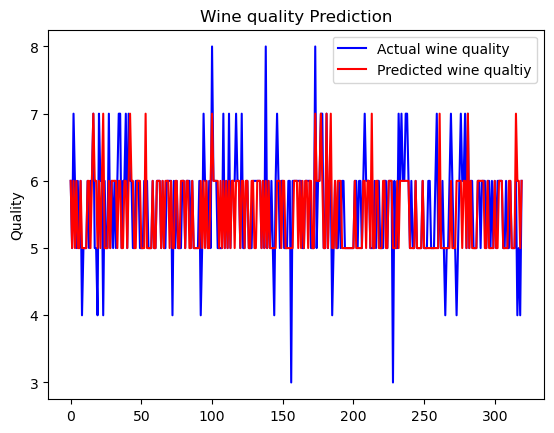

In [38]:
plt.plot(y_test, color = 'blue', label = 'Actual wine quality ')
plt.plot(prediction1 , color = 'red', label = 'Predicted wine qualtiy')
plt.title('Wine quality Prediction')
plt.ylabel('Quality')
plt.legend()
plt.show()

In [39]:
mae1 = mean_absolute_error(ytest, prediction1)
print("Validation MAE for Logistic Regression Model: {}".format(mae1))

Validation MAE for Logistic Regression Model: 0.43125


**Insight :**
+ The calculated accuracy of the LogisticRegression model is 0.5590304925723222.

+ The calculated error of the LogisticRegression model is 0.43125.

#### 2. Decision Tree Classifier

In [40]:
#Using Decision Tree Classifier of tree class to use Decision Tree Algorithm

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [41]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [42]:
#print model accuracy on the training data.
print('Decision Tree Classifier Training Accuracy:', dt.score(xtrain, ytrain))

Decision Tree Classifier Training Accuracy: 1.0


In [43]:
prediction2 = dt.predict(xtest)
print(prediction2)

[6 5 7 5 5 6 5 6 4 6 5 5 6 5 5 6 7 5 7 4 8 5 6 7 6 5 5 7 5 7 6 5 5 5 7 7 5
 6 6 5 5 7 6 7 6 5 5 6 4 6 5 5 6 6 6 5 6 5 7 6 5 5 6 5 5 6 5 5 7 6 6 5 5 6
 7 6 5 5 5 7 7 6 7 5 5 7 7 5 7 5 5 6 6 5 5 6 7 5 5 6 7 5 6 5 5 5 5 5 6 5 6
 5 8 4 5 6 6 7 7 6 5 4 4 5 8 7 5 5 6 7 6 5 6 6 6 5 6 5 6 5 6 6 5 5 4 6 8 6
 5 5 6 5 5 5 6 4 6 6 6 6 5 5 7 5 5 5 6 6 6 6 6 6 4 7 6 6 7 6 7 5 5 7 6 6 7
 5 7 6 5 5 6 6 5 6 5 5 5 5 5 5 5 6 6 6 5 5 6 6 7 6 5 7 5 7 5 6 6 7 6 5 5 6
 5 5 6 6 7 6 5 5 5 6 6 5 6 6 6 7 7 6 5 6 5 5 6 6 6 5 5 6 5 5 6 6 7 6 5 4 6
 7 6 6 5 6 5 5 5 5 5 7 6 6 5 7 7 5 7 6 6 5 6 7 6 5 6 5 5 5 6 6 5 6 6 6 5 6
 6 5 6 5 6 5 6 6 6 6 5 7 5 5 5 6 5 5 5 6 6 7 6 6]


In [44]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': prediction2})
comparison

,Actual,Predicted
0,6,6
1,5,5
2,7,7
3,6,5
4,5,5
...,...,...
315,6,6
316,4,6
317,5,7
318,4,6


In [45]:
accuracy_score(y_test, prediction2) # Accuracy score of the Decision Tree model 

0.621875

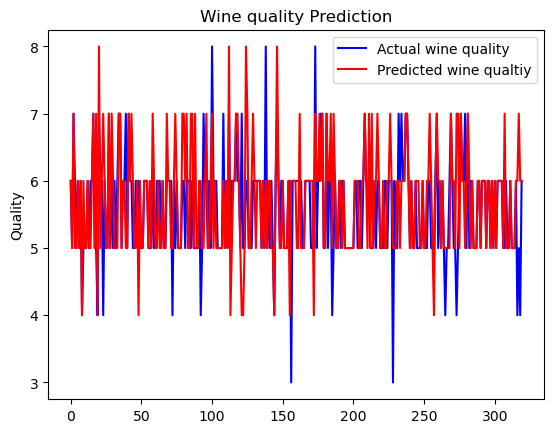

In [46]:
plt.plot(y_test, color = 'blue', label = 'Actual wine quality ')
plt.plot(prediction2 , color = 'red', label = 'Predicted wine qualtiy')
plt.title('Wine quality Prediction')
plt.ylabel('Quality')
plt.legend()
plt.show()


In [47]:
mae2 = mean_absolute_error(ytest, prediction2)
print("Validation MAE for Decision Tree Model: {}".format(mae2))

Validation MAE for Decision Tree Model: 0.465625


**Insight :**
+ The calculated accuracy of the Decision Tree model is 1.0.

+ The calculated error of the Decision Tree model is  0.465625.

#### 3. Random Forest Model

In [48]:
# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

In [49]:
# fit your model
forest = rf_model.fit(xtrain, ytrain)
print(forest)

RandomForestRegressor(random_state=1)


In [50]:
#print model accuracy on the training data.
print('Random forest model Training Accuracy:', forest.score(xtrain, ytrain))

Random forest model Training Accuracy: 0.9236139475712342


In [51]:
prediction3 = forest.predict(xtest)
print(prediction3)

[5.72 4.88 6.98 5.1  5.19 5.69 5.5  6.11 4.68 5.16 5.1  5.2  5.83 5.26
 5.62 6.53 6.9  5.31 5.45 4.88 6.3  5.46 5.98 5.85 5.42 5.1  5.34 6.73
 5.02 6.52 5.53 5.55 5.3  5.31 6.37 6.79 5.36 5.76 6.19 5.21 5.25 6.05
 6.09 6.49 5.83 4.88 5.09 6.02 5.3  6.29 5.15 5.28 5.95 6.08 5.44 5.17
 5.63 5.08 6.67 5.51 5.23 5.5  5.8  6.15 5.11 6.15 5.01 5.2  6.93 5.93
 5.5  5.89 4.86 5.63 5.69 6.   5.22 5.06 5.18 6.43 5.74 5.65 5.69 5.88
 5.45 5.36 5.15 5.03 5.18 4.98 5.35 5.71 6.02 4.81 5.85 5.5  6.61 5.14
 5.19 5.47 6.94 6.02 5.72 5.75 4.99 5.33 4.99 5.33 5.99 5.08 5.96 5.3
 7.09 5.31 5.66 5.56 5.94 6.45 5.94 5.98 5.33 5.74 4.69 5.57 7.06 6.5
 5.49 5.2  5.76 6.62 5.48 5.39 6.02 5.78 5.99 5.26 5.93 5.07 6.01 5.05
 5.91 5.08 5.09 5.3  4.59 5.83 7.09 6.21 5.44 5.06 5.95 5.53 5.33 5.36
 5.63 5.53 5.69 5.77 6.17 6.26 6.   5.48 6.6  5.39 5.29 4.97 6.01 6.44
 5.93 5.91 6.3  5.74 4.77 6.75 4.92 6.41 5.93 6.94 6.54 5.43 5.09 6.84
 5.71 6.22 6.35 5.22 5.44 5.72 5.04 5.53 6.05 5.38 5.32 5.74 5.11 5.06
 5.1  5.

In [52]:
y_pred = forest[0].predict(xtest)

ytest.iloc[0],y_pred[0]

(6, 6.0)

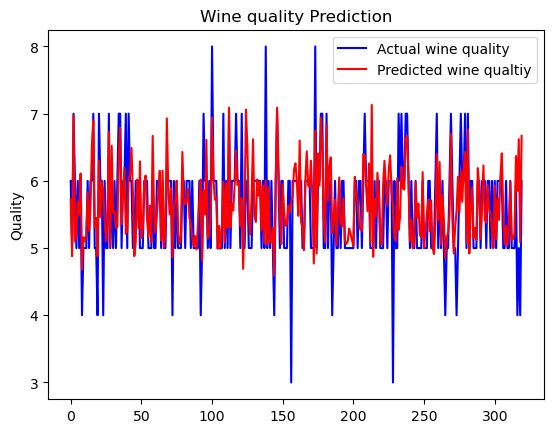

In [53]:
plt.plot(y_test, color = 'blue', label = 'Actual wine quality ')
plt.plot(prediction3 , color = 'red', label = 'Predicted wine qualtiy')
plt.title('Wine quality Prediction')
plt.ylabel('Quality')
plt.legend()
plt.show()

In [54]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': prediction3})
comparison

,Actual,Predicted
0,6,5.72
1,5,4.88
2,7,6.98
3,6,5.10
4,5,5.19
...,...,...
315,6,6.37
316,4,5.85
317,5,6.62
318,4,5.09


In [55]:
accuracy_score(y_test, y_pred) # Accuracy score of the Random Forest model

0.596875

In [56]:
print("Mabs error   : " + str(metrics.mean_absolute_error(ytest, y_pred)))
print("M sqrd error : " + str(metrics.mean_squared_error(ytest, y_pred)))
print("RMS error    : " + str(np.sqrt(metrics.mean_squared_error(ytest, y_pred))))

Mabs error   : 0.496875
M sqrd error : 0.715625
RMS error    : 0.8459462157844315


In [57]:
print("Mabs error   : " + str(metrics.mean_absolute_error(ytest, prediction3)))
print("M sqrd error : " + str(metrics.mean_squared_error(ytest, prediction3)))
print("RMS error    : " + str(np.sqrt(metrics.mean_squared_error(ytest, prediction3))))


# As you can see the differnce, Prediction2 is better than y_pred 

Mabs error   : 0.40562499999999996
M sqrd error : 0.33848874999999995
RMS error    : 0.5817978600854423


In [58]:
# Calculate the mean absolute error of your Random Forest model on the validation data
rf_preds = forest.predict(xtest)
rf_val_mae = mean_absolute_error(ytest, rf_preds)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.40562499999999996


**Insight :**
+ The calculated accuracy of the Random Forest model is 0.9236139475712342.

+ The calculated error of the Random Forest model is  0.496875.

#### 4. Support Vector Machine algorithm(SVM)

In [59]:
#Using SVC method of svm class to use Kernel SVM Algorithm
# fit your model
svc_rbf = SVC(kernel = 'rbf', random_state = 0)

In [60]:
svc = svc_rbf.fit(xtrain, ytrain)

In [61]:
print(svc)

SVC(random_state=0)


In [62]:
print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(xtrain, ytrain))

Support Vector Machine (RBF Classifier) Training Accuracy: 0.6090695856137608


In [63]:
prediction4 = svc.predict(xtest)
#print(prediction4)

In [64]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': prediction4})
comparison

,Actual,Predicted
0,6,6
1,5,5
2,7,7
3,6,5
4,5,6
...,...,...
315,6,6
316,4,6
317,5,6
318,4,5


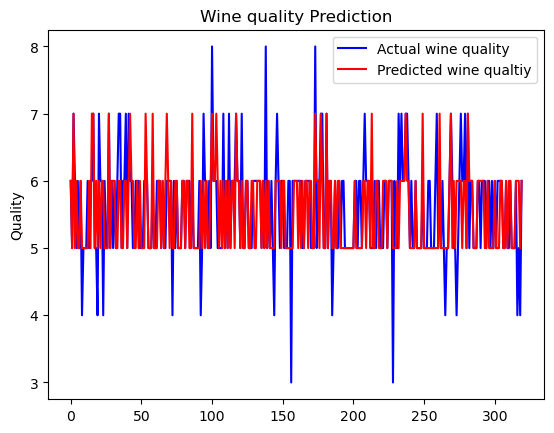

In [65]:
plt.plot(y_test, color = 'blue', label = 'Actual wine quality ')
plt.plot(prediction4 , color = 'red', label = 'Predicted wine qualtiy')
plt.title('Wine quality Prediction')
plt.ylabel('Quality')
plt.legend()
plt.show()

In [66]:
accuracy_score(y_test, prediction4) # Accuracy score of the model SVM 

0.61875

In [67]:
# Calculate the mean absolute error of your SVM model on the validation data

svc_val_mae = mean_absolute_error(ytest, prediction4 )

print("Validation MAE for SVM Model: {}".format(rf_val_mae))

Validation MAE for SVM Model: 0.40562499999999996


**Insight :**
+ The calculated accuracy of the SVM model is 0.61875.

+ The calculated error of the SVM model is 0.40562499999999996.

### 7. Conclusion

Order of the best model for wine quality predictions according to the applied Regression models and classifiers in ascending order is given below---

SVM < Logistic Regression < Decision Tree  < Random Forest model
0.40 < 0.43 < 0.46 <  0.49

SVM And Logistic Regression  are the best fitted  model here with a less mean absolute error and better prediction result,
Let's take a look again on them -----

In [68]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted': prediction4})
comparison

,Actual,Predicted
0,6,6
1,5,5
2,7,7
3,6,5
4,5,6
...,...,...
315,6,6
316,4,6
317,5,6
318,4,5


In [69]:
# Confusion matrix

print("The confusion matrix for checking the correct predicted values and wrong predicted values from the model---")
print()
print(confusion_matrix(ytest, prediction4, labels=np.unique(ytest)))

The confusion matrix for checking the correct predicted values and wrong predicted values from the model---

[[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0 107  27   1   0]
 [  0   0  51  82   9   0]
 [  0   0   2  16   9   0]
 [  0   0   0   1   2   0]]


In [70]:
print("The accuracy score of the model is --")
accuracy_score(y_test, prediction4) # Accuracy score of the model SVM 

The accuracy score of the model is --


0.61875

### Hence, 
### It is verified that Good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.
